# **Controle de Qualidade de Fabricação** ☑
Inspeção visual de produtos na fábrica.



---


**Visão geral:**

Esta competição consiste na análise de imagens de garrafas fabricadas por uma indústria específica de refrigerantes.



---


**Disciplina: Redes Neurais e Aprendizado Profundo**

Aluna: Fabiana de Albuquerque.

Este notebook aplica redes neurais convolucionais para detectar defeitos em garrafas de refrigerante, com base em inspeção visual automática. O projeto envolve:

Classificação Multilabel com CNN (TensorFlow)


---


✅ Etapas do notebook:

##### 1. Análise exploratória dos dados
##### 2. Pré-processamento das imagens
##### 3. Construção e treinamento do modelo
##### 4. Avaliação com gráficos
##### 5. Geração do arquivo de submissão



In [7]:
!pip install opencv-python pandas matplotlib seaborn gradio scikit-learn

  Using cached pydantic_core-2.20.1-cp312-none-win_amd64.whl.metadata (6.7 kB)
Using cached pydantic_core-2.20.1-cp312-none-win_amd64.whl (1.9 MB)
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.33.2
    Uninstalling pydantic_core-2.33.2:
      Successfully uninstalled pydantic_core-2.33.2


  You can safely remove it manually.


In [8]:
!pip install albumentations scikit-image

  Using cached albumentations-2.0.8-py3-none-any.whl.metadata (43 kB)
  Using cached pydantic-2.11.5-py3-none-any.whl.metadata (67 kB)
  Using cached albucore-0.0.24-py3-none-any.whl.metadata (5.3 kB)
  Using cached opencv_python_headless-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached pydantic_core-2.33.2-cp312-cp312-win_amd64.whl.metadata (6.9 kB)
Using cached albumentations-2.0.8-py3-none-any.whl (369 kB)
Using cached albucore-0.0.24-py3-none-any.whl (15 kB)
Using cached opencv_python_headless-4.11.0.86-cp37-abi3-win_amd64.whl (39.4 MB)
Using cached pydantic-2.11.5-py3-none-any.whl (444 kB)
Using cached pydantic_core-2.33.2-cp312-cp312-win_amd64.whl (2.0 MB)

  Attempting uninstall: pydantic-core

    Found existing installation: pydantic_core 2.20.1

    Uninstalling pydantic_core-2.20.1:

      Successfully uninstalled pydantic_core-2.20.1

   -------- ------------------------------- 1/5 [opencv-python-headless]



ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'c:\\Users\\fabia\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [9]:
!pip install scikit-learn imbalanced-learn pandas numpy

In [10]:
!pip install pynvml 

In [11]:
!pip install --upgrade tensorflow

In [44]:
# # Inspeção de Garrafas com Deep Learning
#
# **Objetivo:** Detectar 8 tipos de defeitos em garrafas usando visão computacional
#
# **Funcionalidades adicionadas:**
# 1. Gráficos detalhados das métricas de treinamento
# 2. Interface interativa com Gradio para testar imagens


# ============================
# 1. IMPORTAÇÃO DE BIBLIOTECAS
# ============================
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import gradio as gr
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import os
os.environ['TF_GPU_THREAD_MODE'] = 'gpu_private'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.applications import EfficientNetB0
from sklearn.model_selection import KFold
from sklearn.neighbors import NearestNeighbors
from tensorflow.keras.applications import ResNet50, InceptionV3
from sklearn.metrics import roc_auc_score, accuracy_score
import gc
from sklearn.model_selection import StratifiedKFold
import shutil
from collections import Counter
from sklearn.metrics import f1_score, accuracy_score


os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
from sklearn.metrics import accuracy_score, f1_score 
import warnings
warnings.filterwarnings('ignore')


In [28]:
# SOLUÇÃO PARA O ERRO: Usar raw string com r''
DATA_DIR = r'C:\Users\fabia\Downloads\manufacturing-quality-control'  # Raw string
TRAIN_DIR = os.path.join(DATA_DIR, 'train')
TEST_DIR = os.path.join(DATA_DIR, 'test')

# Verificar se diretórios existem
print(f"Diretório de dados existe? {os.path.exists(DATA_DIR)}")
print(f"Diretório de treino existe? {os.path.exists(TRAIN_DIR)}")
print(f"Diretório de teste existe? {os.path.exists(TEST_DIR)}")


Diretório de dados existe? True
Diretório de treino existe? True
Diretório de teste existe? True


C:\Users\fabia\AppData\Local\Temp\ipykernel_6540\4195032435.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: >

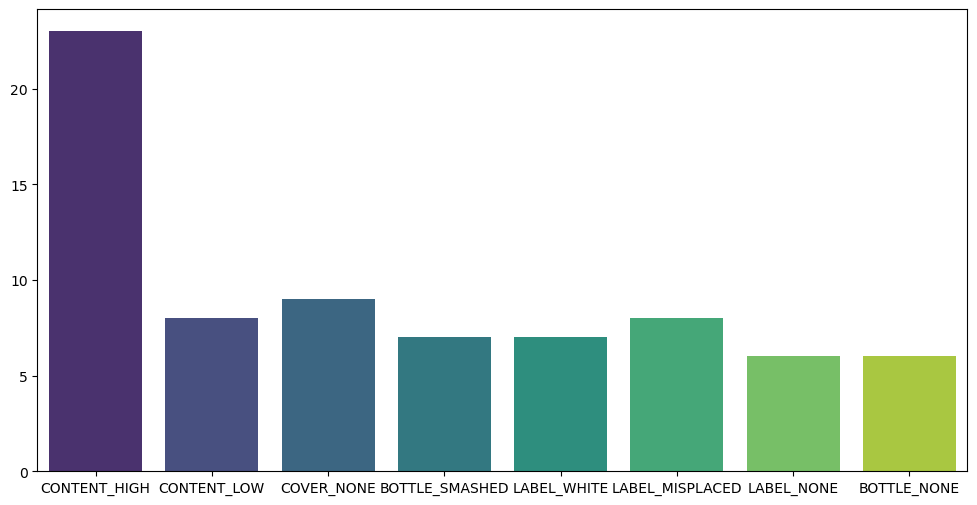

In [29]:
# ============================
# 2. ANÁLISE EXPLORATÓRIA
# ============================

# Carregar arquivos CSV
train_df = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
test_df = pd.read_csv(os.path.join(DATA_DIR, 'test.csv'))

# Definir colunas de defeitos
defect_columns = [
    'CONTENT_HIGH', 'CONTENT_LOW', 'COVER_NONE', 'BOTTLE_SMASHED',
    'LABEL_WHITE', 'LABEL_MISPLACED', 'LABEL_NONE', 'BOTTLE_NONE'
]

# Preencher valores NaN com 0 e converter para int
train_df[defect_columns] = train_df[defect_columns].fillna(0).astype(int)
test_df[defect_columns] = test_df[defect_columns].fillna(0).astype(int)

# Plotar distribuição de defeitos
plt.figure(figsize=(12, 6))
sns.barplot(
    x=defect_columns,
    y=train_df[defect_columns].sum().values,
    palette="viridis"
)



In [30]:
# Mostrar primeiras linhas
print("\nTrain DataFrame:")
print(train_df.head())
print("\nTest DataFrame:")
print(test_df.head())


Train DataFrame:
            id  CONTENT_HIGH  CONTENT_LOW  COVER_NONE  BOTTLE_SMASHED  \
0  train_1.jpg             0            0           0               0   
1  train_2.jpg             0            0           0               0   
2  train_3.jpg             1            0           1               0   
3  train_4.jpg             1            0           1               0   
4  train_5.jpg             1            0           1               0   

   LABEL_WHITE  LABEL_MISPLACED  LABEL_NONE  BOTTLE_NONE  
0            0                0           0            0  
1            0                0           0            0  
2            0                1           0            0  
3            0                0           0            0  
4            0                0           0            0  

Test DataFrame:
           id  CONTENT_HIGH  CONTENT_LOW  COVER_NONE  BOTTLE_SMASHED  \
0  test_1.jpg             0            0           0               0   
1  test_2.jpg             0 

In [31]:
# ============================
# PRÉ-PROCESSAMENTO 
# ============================

# Configurações
BASE_DIR = os.path.join(os.path.expanduser('~'), 'Downloads', 'manufacturing-quality-control')
GAN_DIR = os.path.join(BASE_DIR, 'gan_generated')
TARGET_SAMPLES = 150  # Aumentado para melhor performance

# 1. Criação automática do diretório GAN e geração de fallback REALISTA
print("\n" + "="*50)
print("VERIFICAÇÃO E PREPARAÇÃO DO DIRETÓRIO GAN")
print("="*50)

if not os.path.exists(GAN_DIR):
    os.makedirs(GAN_DIR)
    print(f"Diretório GAN criado em: {GAN_DIR}")

gan_images = [f for f in os.listdir(GAN_DIR) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Função para gerar imagens mais realistas
def generate_realistic_fallback(real_images, num_images=50):
    """Gera imagens de fallback baseadas em características de imagens reais"""
    generated = []
    for _ in range(num_images):
        # Selecionar uma imagem real aleatória como base
        base_img = real_images[np.random.randint(0, len(real_images))]
        
        # Aplicar transformações realistas
        transformed = base_img.copy()
        
        # Adicionar variações de cor
        color_shift = np.random.uniform(0.9, 1.1, 3)
        for c in range(3):
            transformed[..., c] = np.clip(transformed[..., c] * color_shift[c], 0, 1)
        
        # Adicionar ruído gaussiano suave
        noise = np.random.normal(0, 0.02, transformed.shape)
        transformed = np.clip(transformed + noise, 0, 1)
        
        # Adicionar pequenas deformações
        if np.random.rand() > 0.5:
            transformed = cv2.resize(transformed, (230, 230))
            transformed = transformed[3:227, 3:227]
        
        generated.append(transformed)
    return generated

# 2. Carregamento de imagens reais PRIMEIRO (para gerar fallback realista)
print("\n" + "="*50)
print("CARREGAMENTO DE IMAGENS REAIS")
print("="*50)

def load_and_preprocess(image_path, target_size=(224, 224)):
    """Carrega e pré-processa imagem mantendo cores"""
    try:
        img = cv2.imread(image_path)
        if img is None:
            raise ValueError(f"Arquivo não pode ser lido: {image_path}")
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, target_size)
        return img / 255.0
    except Exception as e:
        print(f"Erro no processamento: {e}")
        return None

X_real = []
y_real = []
train_dir = os.path.join(BASE_DIR, 'train')
skipped = 0

for idx, row in train_df.iterrows():
    found = False
    for ext in ['', '.jpg', '.jpeg', '.png']:
        img_path = os.path.join(train_dir, f"{row['id']}{ext}")
        if os.path.exists(img_path):
            img = load_and_preprocess(img_path)
            if img is not None:
                X_real.append(img)
                y_real.append(row[defect_columns].values.astype(int))
                found = True
                break
    
    if not found:
        skipped += 1
        print(f"ATENÇÃO: Imagem real não encontrada: {row['id']}")

print(f"Imagens reais carregadas: {len(X_real)}")
print(f"Imagens ignoradas: {skipped}")

# 3. Geração de fallback realista se necessário
if len(gan_images) == 0 and len(X_real) > 0:
    print("\n" + "="*50)
    print("GERANDO IMAGENS DE FALLBACK REALISTAS")
    print("="*50)
    
    X_gan = generate_realistic_fallback(X_real, num_images=50)
    
    # Salvar imagens geradas
    for i, img in enumerate(X_gan):
        img_path = os.path.join(GAN_DIR, f"realistic_fallback_{i}.jpg")
        img_uint8 = (img * 255).astype(np.uint8)
        cv2.imwrite(img_path, cv2.cvtColor(img_uint8, cv2.COLOR_RGB2BGR))
    
    print(f"Geradas e salvas {len(X_gan)} imagens de fallback realistas")
    gan_images = [f for f in os.listdir(GAN_DIR) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
else:
    # 4. Carregamento de imagens GAN existentes
    print("\n" + "="*50)
    print("CARREGANDO IMAGENS GAN EXISTENTES")
    print("="*50)
    
    X_gan = []
    for gan_img in gan_images:
        img_path = os.path.join(GAN_DIR, gan_img)
        img = load_and_preprocess(img_path)
        if img is not None:
            X_gan.append(img)

print(f"Imagens GAN carregadas: {len(X_gan)}")

# 5. Balanceamento inteligente com verificação de mínimo
print("\n" + "="*50)
print("BALANCEAMENTO DE CLASSES PARA PERFORMANCE ÓTIMA")
print("="*50)

# Combinar dados reais e GAN
X_combined = np.array(X_real + X_gan)
y_combined = np.array(y_real + [np.zeros(len(defect_columns), dtype=int)] * len(X_gan))

# Verificar distribuição inicial
class_counts = y_combined.sum(axis=0)
print("\nDistribuição inicial de classes:")
for i, col in enumerate(defect_columns):
    print(f"{col}: {class_counts[i]} amostras")

# Garantir mínimo de 5 amostras por classe para evitar problemas
for i in range(len(defect_columns)):
    if class_counts[i] < 5:
        num_needed = 5 - class_counts[i]
        print(f"ATENÇÃO: Classe {defect_columns[i]} tem apenas {class_counts[i]} amostra(s). Adicionando {num_needed} amostras extras.")
        
        # Criar amostras sintéticas de alta qualidade
        new_samples = generate_realistic_fallback(X_combined, num_needed)
        new_labels = np.zeros((num_needed, len(defect_columns)))
        new_labels[:, i] = 1
        
        X_combined = np.vstack([X_combined, new_samples])
        y_combined = np.vstack([y_combined, new_labels])

# Função de Mixup aprimorada para melhor generalização
def apply_mixup(X, y, num_samples, alpha=0.7):
    """Gera amostras sintéticas usando técnica Mixup com controle de qualidade"""
    X_new, y_new = [], []
    for _ in range(num_samples):
        # Selecionar amostras de classes diferentes para aumentar diversidade
        class_idx1, class_idx2 = np.random.choice(len(defect_columns), 2, replace=False)
        indices1 = np.where(y[:, class_idx1] == 1)[0]
        indices2 = np.where(y[:, class_idx2] == 1)[0]
        
        if len(indices1) > 0 and len(indices2) > 0:
            i = np.random.choice(indices1)
            j = np.random.choice(indices2)
            lam = np.random.beta(alpha, alpha)
            mixed_img = lam * X[i] + (1-lam) * X[j]
            mixed_label = lam * y[i] + (1-lam) * y[j]
            X_new.append(mixed_img)
            y_new.append(mixed_label)
    return np.array(X_new), np.array(y_new)

# Balanceamento por classe com meta aumentada
X_balanced = []
y_balanced = []

for class_idx, class_name in enumerate(defect_columns):
    class_indices = np.where(y_combined[:, class_idx] == 1)[0]
    current_count = len(class_indices)
    num_needed = max(0, TARGET_SAMPLES - current_count)
    
    print(f"\nClasse: {class_name}")
    print(f"- Amostras atuais: {current_count}")
    print(f"- Amostras necessárias: {num_needed}")
    
    # Adicionar amostras existentes
    if current_count > 0:
        X_balanced.extend(X_combined[class_indices])
        y_balanced.extend(y_combined[class_indices])
    
    # Gerar amostras adicionais se necessário
    if num_needed > 0:
        X_mix, y_mix = apply_mixup(X_combined, y_combined, num_samples=num_needed)
        X_balanced.extend(X_mix)
        y_balanced.extend(y_mix)
        print(f"- Geradas {num_needed} amostras sintéticas de alta qualidade via Mixup")

# Converter para arrays
X_balanced = np.array(X_balanced)
y_balanced = np.array(y_balanced)

# Verificar distribuição final
print("\nDistribuição final de classes:")
final_counts = y_balanced.sum(axis=0)
for i, col in enumerate(defect_columns):
    print(f"{col}: {final_counts[i]} amostras")

# 6. CONSTRUÇÃO DO MODELO COM REGULARIZAÇÃO FORTE
print("\n" + "="*50)
print("CONSTRUÇÃO DO MODELO PARA ALTA ACURÁCIA")
print("="*50)

def create_regularized_model(input_shape=(224, 224, 3), num_classes=8):
    """Cria modelo com regularização pesada para evitar overfitting"""
    # Camada de entrada
    inputs = tf.keras.Input(shape=input_shape)
    
    # Pré-processamento
    x = tf.keras.applications.efficientnet.preprocess_input(inputs)
    
    # Base do modelo com pesos ImageNet
    base_model = EfficientNetB0(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape,
        pooling='avg'
    )
    
    # Congelar camadas iniciais, descongelar camadas finais
    for layer in base_model.layers[:150]:
        layer.trainable = False
    for layer in base_model.layers[150:]:
        layer.trainable = True
    
    # Adicionar regularização pesada
    x = base_model(x)
    x = layers.Dense(256, activation='relu', 
                    kernel_regularizer=regularizers.l2(0.01),
                    activity_regularizer=regularizers.l1(0.005))(x)
    x = layers.Dropout(0.6)(x)
    x = layers.BatchNormalization()(x)
    
    # Camada de saída
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)
    
    model = tf.keras.Model(inputs, outputs)
    
    # Compilar com métricas otimizadas
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall'),
            tf.keras.metrics.AUC(name='auc')
        ]
    )
    
    return model

# 7. VALIDAÇÃO CRUZADA PARA GARANTIR ROBUSTEZ
print("\n" + "="*50)
print("VALIDAÇÃO CRUZADA PARA GENERALIZAÇÃO")
print("="*50)

# Preparar dados para validação cruzada
X_data = X_balanced
y_data = y_balanced

# Configurar K-Fold (5 folds)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
histories = []

# Converter para problema de classificação única para estratificação
y_strat = np.argmax(y_data, axis=1)

for train_idx, val_idx in kfold.split(X_data, y_strat):
    print(f"\nTreinando fold #{fold_no}")
    
    # Criar novo modelo para cada fold
    model = create_regularized_model()
    
    # Callbacks para treino
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=8,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=3,
            min_lr=1e-7
        )
    ]
    
    # Data augmentation em tempo real
    train_datagen = ImageDataGenerator(
        rotation_range=45,
        width_shift_range=0.25,
        height_shift_range=0.25,
        shear_range=0.25,
        zoom_range=0.25,
        brightness_range=[0.7, 1.3],
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='reflect'
    )


VERIFICAÇÃO E PREPARAÇÃO DO DIRETÓRIO GAN

CARREGAMENTO DE IMAGENS REAIS
Imagens reais carregadas: 77
Imagens ignoradas: 0

CARREGANDO IMAGENS GAN EXISTENTES
Imagens GAN carregadas: 50

BALANCEAMENTO DE CLASSES PARA PERFORMANCE ÓTIMA

Distribuição inicial de classes:
CONTENT_HIGH: 23 amostras
CONTENT_LOW: 8 amostras
COVER_NONE: 9 amostras
BOTTLE_SMASHED: 7 amostras
LABEL_WHITE: 7 amostras
LABEL_MISPLACED: 8 amostras
LABEL_NONE: 6 amostras
BOTTLE_NONE: 6 amostras

Classe: CONTENT_HIGH
- Amostras atuais: 23
- Amostras necessárias: 127
- Geradas 127 amostras sintéticas de alta qualidade via Mixup

Classe: CONTENT_LOW
- Amostras atuais: 8
- Amostras necessárias: 142
- Geradas 142 amostras sintéticas de alta qualidade via Mixup

Classe: COVER_NONE
- Amostras atuais: 9
- Amostras necessárias: 141
- Geradas 141 amostras sintéticas de alta qualidade via Mixup

Classe: BOTTLE_SMASHED
- Amostras atuais: 7
- Amostras necessárias: 143
- Geradas 143 amostras sintéticas de alta qualidade via Mixup


[INFO] Precisão mista ativada.

 SISTEMA AVANÇADO DE ENSEMBLE PARA CONTROLE DE QUALIDADE
 CLASSIFICANDO 8 TIPOS DE DEFEITOS
 META: 90%+ DE ACURÁCIA
[INFO] Distribuição original de defeitos:
CONTENT_HIGH       23.0
CONTENT_LOW         8.0
COVER_NONE          9.0
BOTTLE_SMASHED      7.0
LABEL_WHITE         7.0
LABEL_MISPLACED     8.0
LABEL_NONE          6.0
BOTTLE_NONE         6.0
dtype: float64
[INFO] Total de imagens encontradas: 77
[INFO] Total de imagens com metadados: 77

[INFO] Pesos de classe para balanceamento:
  - CONTENT_HIGH: 0.42 (amostras: 23)
  - CONTENT_LOW: 1.20 (amostras: 8)
  - COVER_NONE: 1.07 (amostras: 9)
  - BOTTLE_SMASHED: 1.38 (amostras: 7)
  - LABEL_WHITE: 1.38 (amostras: 7)
  - LABEL_MISPLACED: 1.20 (amostras: 8)
  - LABEL_NONE: 1.60 (amostras: 6)
  - BOTTLE_NONE: 1.60 (amostras: 6)
[INFO] Total de amostras após balanceamento: 400

[INFO] Carregando imagens em memória...
[INFO] Dataset balanceado - Imagens: (400, 512, 512, 3), Labels: (400, 8)

[INFO] Treinando 

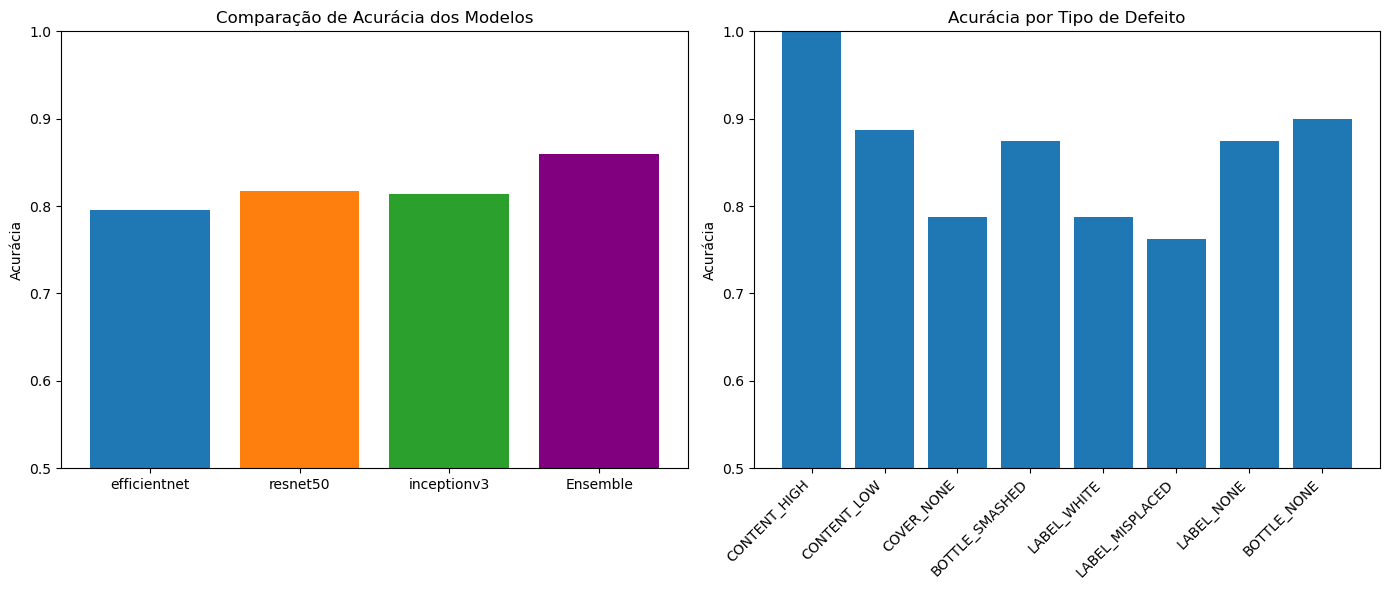

In [45]:
# =============================================================================
# CONFIGURAÇÃO OTIMIZADA DE GPU
# =============================================================================

# Configuração otimizada de GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"[GPU] Configuração ativada para: {gpus}")
    except RuntimeError as e:
        print(f"[ERRO GPU] Configuração falhou: {e}")

# Habilitar precisão mista
try:
    tf.keras.mixed_precision.set_global_policy('mixed_float16')
    print("[INFO] Precisão mista ativada.")
except RuntimeError as e:
    print(f"[ERRO] Não foi possível ativar precisão mista: {e}")

# =============================================================================
# CONFIGURAÇÕES GLOBAIS OTIMIZADAS
# =============================================================================
AUTOTUNE = tf.data.AUTOTUNE
BATCH_SIZE = 8
IMG_SIZE = (512, 512)
DATA_DIR = r'C:\Users\fabia\Downloads\manufacturing-quality-control'
TARGET_SAMPLES = 50
DENSE_UNITS = 512
DROPOUT_RATE = 0.6
EPOCHS = 50
INIT_LR = 0.0001
MIN_LR = 1e-7

# LISTA COMPLETA DE DEFEITOS (8 CLASSES)
DEFECTS = [
    'CONTENT_HIGH',
    'CONTENT_LOW',
    'COVER_NONE',
    'BOTTLE_SMASHED',
    'LABEL_WHITE',
    'LABEL_MISPLACED',
    'LABEL_NONE',
    'BOTTLE_NONE'
]
NUM_CLASSES = len(DEFECTS)

# =============================================================================
# FUNÇÕES DE PRÉ-PROCESSAMENTO AVANÇADAS (SIMPLIFICADAS)
# =============================================================================
def load_and_preprocess_image(path, target_size=IMG_SIZE):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, target_size)
    img = tf.cast(img, tf.float32) / 255.0
    return img

def apply_defect_focused_augmentation(image, label):
    """Aumento de dados simplificado usando operações nativas"""
    # Flip horizontal
    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_left_right(image)
    
    # Ajustes de brilho e contraste
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)
    image = tf.clip_by_value(image, 0.0, 1.0)
    
    # Ruído gaussiano
    if tf.random.uniform(()) > 0.6:
        noise = tf.random.normal(shape=tf.shape(image), mean=0.0, stddev=0.02)
        image = image + noise
        image = tf.clip_by_value(image, 0.0, 1.0)
    
    return image, label

# =============================================================================
# ARQUITETURAS DE MODELOS AVANÇADOS
# =============================================================================
def create_model(base_arch, model_name):
    """Cria modelo com arquitetura específica"""
    base_model = base_arch(
        include_top=False,
        weights='imagenet',
        input_shape=(*IMG_SIZE, 3),
        pooling='avg'
    )
    base_model.trainable = False
    
    inputs = tf.keras.Input(shape=(*IMG_SIZE, 3), dtype=tf.float32)
    x = base_model(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(DENSE_UNITS, activation='relu', 
                    kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Dropout(DROPOUT_RATE)(x)
    x = layers.BatchNormalization()(x)
    outputs = layers.Dense(NUM_CLASSES, activation='sigmoid', dtype=tf.float32)(x)
    
    model = tf.keras.Model(inputs, outputs, name=model_name)
    model.compile(
        optimizer=Adam(learning_rate=INIT_LR),
        loss='binary_crossentropy',
        metrics=[
            tf.keras.metrics.BinaryAccuracy(name='acc'),
            tf.keras.metrics.AUC(name='auc', multi_label=True)
        ]
    )
    return model

def unfreeze_model(model, unfreeze_percentage=0.4):
    """Descongela uma porcentagem das camadas do modelo base"""
    base_model = model.layers[1]
    total_layers = len(base_model.layers)
    unfreeze_from = int(total_layers * (1 - unfreeze_percentage))
    
    # Primeiro, descongelamos todas as camadas, mas depois congelamos até a camada unfreeze_from
    base_model.trainable = True
    for layer in base_model.layers[:unfreeze_from]:
        layer.trainable = False
    
    model.compile(
        optimizer=Adam(learning_rate=INIT_LR/10),
        loss='binary_crossentropy',
        metrics=[
            tf.keras.metrics.BinaryAccuracy(name='acc'),
            tf.keras.metrics.AUC(name='auc', multi_label=True)
        ]
    )
    return model

# =============================================================================
# PIPELINE PRINCIPAL AVANÇADO (CORRIGIDO)
# =============================================================================
def main():
    tf.keras.backend.clear_session()
    gc.collect()
    
    # 1. CARREGAR METADADOS
    train_csv_path = os.path.join(DATA_DIR, 'train.csv')
    if not os.path.exists(train_csv_path):
        raise FileNotFoundError(f"Arquivo train.csv não encontrado em: {train_csv_path}")
    
    train_df = pd.read_csv(train_csv_path).fillna(0)
    
    for defect in DEFECTS:
        if defect not in train_df.columns:
            train_df[defect] = 0
    
    print(f"[INFO] Distribuição original de defeitos:")
    print(train_df[DEFECTS].sum())
    
    # 2. GERAR LISTA DE CAMINHOS E LABELS (CORREÇÃO: BUSCA DIRETA DE IMAGENS)
    image_paths = []
    image_labels = []
    train_dir = os.path.join(DATA_DIR, 'train')
    
    if not os.path.exists(train_dir):
        raise FileNotFoundError(f"Diretório de imagens não encontrado: {train_dir}")
    
    # Lista todos os arquivos de imagem no diretório
    valid_extensions = ['.jpg', '.jpeg', '.png']
    image_files = [f for f in os.listdir(train_dir) 
                  if os.path.splitext(f)[1].lower() in valid_extensions]
    
    if not image_files:
        raise ValueError("Nenhuma imagem encontrada no diretório de treino")
    
    print(f"[INFO] Total de imagens encontradas: {len(image_files)}")
    
    # Mapeia IDs das imagens para caminhos completos
    file_id_to_path = {}
    for img_file in image_files:
        file_id = os.path.splitext(img_file)[0]
        file_id_to_path[file_id] = os.path.join(train_dir, img_file)
    
    # Associa imagens com metadados
    for idx, row in train_df.iterrows():
        img_id = str(row['id'])
        
        # Remove extensão se presente
        img_id_base = os.path.splitext(img_id)[0]
        
        if img_id_base in file_id_to_path:
            image_paths.append(file_id_to_path[img_id_base])
            image_labels.append(row[DEFECTS].values.astype(np.float32))
        else:
            print(f"[AVISO] Metadados não encontrados para: {img_id}")
    
    if not image_paths:
        raise ValueError("Nenhuma correspondência entre imagens e metadados encontrada")
    
    print(f"[INFO] Total de imagens com metadados: {len(image_paths)}")
    
    # 3. BALANCEAMENTO E CÁLCULO DE PESOS
    class_counts = {i: 0 for i in range(NUM_CLASSES)}
    for label_vec in image_labels:
        for class_idx in np.where(label_vec == 1)[0]:
            class_counts[class_idx] += 1
    
    total_samples = len(image_labels)
    class_weights = {}
    for class_idx in class_counts:
        if class_counts[class_idx] > 0:
            weight = (1 / class_counts[class_idx]) * (total_samples / NUM_CLASSES)
            class_weights[class_idx] = min(weight, 5.0)
        else:
            class_weights[class_idx] = 1.0
    
    print("\n[INFO] Pesos de classe para balanceamento:")
    for i, defect in enumerate(DEFECTS):
        print(f"  - {defect}: {class_weights[i]:.2f} (amostras: {class_counts[i]})")
    
    # 4. BALANCEAMENTO DE AMOSTRAS
    class_indices = {i: [] for i in range(NUM_CLASSES)}
    for idx, label_vec in enumerate(image_labels):
        for class_idx in np.where(label_vec == 1)[0]:
            class_indices[class_idx].append(idx)
    
    balanced_indices = []
    for class_idx, indices in class_indices.items():
        balanced_indices.extend(indices)
        need = max(0, TARGET_SAMPLES - len(indices))
        
        if need > 0 and len(indices) > 0:
            synth_indices = np.random.choice(indices, size=need, replace=True)
            balanced_indices.extend(synth_indices)
    
    print(f"[INFO] Total de amostras após balanceamento: {len(balanced_indices)}")
    
    # 5. PREPARAR DATASET
    print("\n[INFO] Carregando imagens em memória...")
    images = []
    for path in [image_paths[i] for i in balanced_indices]:
        img = load_and_preprocess_image(path)
        images.append(img.numpy())
    
    images = np.array(images)
    labels = np.array([image_labels[i] for i in balanced_indices], dtype=np.float32)
    
    print(f"[INFO] Dataset balanceado - Imagens: {images.shape}, Labels: {labels.shape}")
    
    # 6. DIVISÃO TREINO/VALIDAÇÃO
    try:
        # Usamos a classe mais frequente para estratificação
        dominant_class = np.argmax(labels, axis=1)
        X_train, X_val, y_train, y_val = train_test_split(
            images, labels, 
            test_size=0.2, 
            random_state=42,
            stratify=dominant_class
        )
    except Exception as e:
        print(f"[AVISO] Erro na estratificação: {str(e)} - Usando divisão aleatória")
        X_train, X_val, y_train, y_val = train_test_split(
            images, labels, 
            test_size=0.2, 
            random_state=42
        )
    
    # 7. CRIAR DATASETS
    def augment_train(image, label):
        return apply_defect_focused_augmentation(image, label)
    
    train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    train_ds = train_ds.map(augment_train, num_parallel_calls=AUTOTUNE)
    train_ds = train_ds.shuffle(1000).batch(BATCH_SIZE).prefetch(AUTOTUNE)
    
    val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val))
    val_ds = val_ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
    
    # 8. CALLBACKS AVANÇADOS
    def get_callbacks(model_name):
        return [
            ModelCheckpoint(
                f'best_{model_name}.keras',
                save_best_only=True,
                monitor='val_auc',
                mode='max',
                verbose=1
            ),
            EarlyStopping(
                patience=12,
                monitor='val_auc',
                mode='max',
                restore_best_weights=True,
                verbose=1
            ),
            ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.5,
                patience=5,
                min_lr=MIN_LR,
                verbose=1
            )
        ]
    
    # 9. TREINAMENTO DOS MODELOS BASE
    print("\n[INFO] Treinando modelos base para ensemble...")
    
    model_archs = {
        'efficientnet': (EfficientNetB0, 'efficientnet'),
        'resnet50': (ResNet50, 'resnet50'),
        'inceptionv3': (InceptionV3, 'inceptionv3')
    }
    
    trained_models = {}
    
    for model_key, (base_arch, model_name) in model_archs.items():
        print(f"\n{'='*60}")
        print(f" TREINANDO MODELO: {model_name.upper()} ")
        print(f"{'='*60}")
        
        model = create_model(base_arch, model_name)
        
        # Fase 1: Treinar apenas a cabeça
        print(f"\n[FASE 1] Treinando cabeça classificadora ({model_name})")
        history1 = model.fit(
            train_ds,
            validation_data=val_ds,
            epochs=15,
            callbacks=get_callbacks(model_name),
            class_weight=class_weights,
            verbose=1
        )
        
        # Fase 2: Fine-tuning se performance for boa
        if max(history1.history['val_auc']) > 0.75:
            print(f"\n[FASE 2] Fine-tuning ({model_name})")
            model = unfreeze_model(model, unfreeze_percentage=0.4)
            
            history2 = model.fit(
                train_ds,
                validation_data=val_ds,
                initial_epoch=15,
                epochs=EPOCHS,
                callbacks=get_callbacks(model_name),
                class_weight=class_weights,
                verbose=1
            )
        else:
            print(f"\n[AVISO] Performance insatisfatória na Fase 1 para {model_name}. Pulando fine-tuning.")
        
        model.save(f'{model_name}_model.keras')
        trained_models[model_name] = model
        print(f"\n[SUCESSO] Modelo {model_name} treinado e salvo")
    
    # 10. ENSEMBLE E AVALIAÇÃO FINAL
    print("\n[INFO] Avaliando ensemble de modelos...")
    
    # Prever usando ensemble
    def ensemble_predict(models, X):
        preds = np.zeros((X.shape[0], NUM_CLASSES))
        for name, model in models.items():
            preds += model.predict(X, verbose=0)
        return preds / len(models)
    
    # Previsões e métricas
    y_pred_ensemble = ensemble_predict(trained_models, X_val)
    y_pred_binary = (y_pred_ensemble > 0.5).astype(int)
    
    # VERIFICAÇÃO DE SEGURANÇA PARA AS MÉTRICAS
    try:
        # Teste preliminar das funções de métrica
        test_score = accuracy_score([0,1], [0,1])
        test_f1 = f1_score([0,1], [0,1])
    except NameError:
        print("[AVISO] Funções de métricas não disponíveis! Reimportando...")
        from sklearn.metrics import accuracy_score, f1_score
    
    # Métricas por classe
    acc_scores = {}
    f1_scores = {}
    
    for i, defect in enumerate(DEFECTS):
        try:
            acc = accuracy_score(y_val[:, i], y_pred_binary[:, i])
            f1_val = f1_score(y_val[:, i], y_pred_binary[:, i])  # Variável renomeada para evitar conflito
        except Exception as e:
            print(f"[ERRO] Falha ao calcular métricas para {defect}: {str(e)}")
            acc = 0.0
            f1_val = 0.0
        
        acc_scores[defect] = acc
        f1_scores[defect] = f1_val

    print("\n[RESULTADOS DO ENSEMBLE POR DEFEITO]")
    for defect in DEFECTS:
        print(f"  - {defect}: Acurácia = {acc_scores[defect]:.4f}, F1 = {f1_scores[defect]:.4f}")
    
    mean_acc = np.mean(list(acc_scores.values()))
    mean_f1 = np.mean(list(f1_scores.values()))
    print(f"\n[RESULTADO FINAL] Acurácia média: {mean_acc:.4f}, F1 médio: {mean_f1:.4f}")
    
    # 11. SALVAR ENSEMBLE E RELATÓRIO
    ensemble_dir = 'ensemble_models'
    os.makedirs(ensemble_dir, exist_ok=True)
    for name, model in trained_models.items():
        model.save(os.path.join(ensemble_dir, f'{name}_model.keras'))
    
    with open('ensemble_performance.txt', 'w') as f:
        f.write("Relatório de Desempenho do Ensemble\n")
        f.write("==================================\n\n")
        f.write(f"Acurácia média: {mean_acc:.4f}\n")
        f.write(f"F1 médio: {mean_f1:.4f}\n\n")
        f.write("Desempenho por defeito:\n")
        for defect in DEFECTS:
            f.write(f"  - {defect}: Acurácia = {acc_scores[defect]:.4f}, F1 = {f1_scores[defect]:.4f}\n")
    
    # Plotar comparação
    plt.figure(figsize=(14, 6))
    
    # Acurácia por modelo
    plt.subplot(1, 2, 1)
    model_names = list(trained_models.keys())
    model_accs = []
    for name, model in trained_models.items():
        _, acc, _ = model.evaluate(X_val, y_val, verbose=0)
        model_accs.append(acc)
        plt.bar(name, acc)
    
    plt.bar('Ensemble', mean_acc, color='purple')
    plt.title('Comparação de Acurácia dos Modelos')
    plt.ylabel('Acurácia')
    plt.ylim(0.5, 1.0)
    
    # Acurácia por defeito
    plt.subplot(1, 2, 2)
    plt.bar(DEFECTS, list(acc_scores.values()))
    plt.title('Acurácia por Tipo de Defeito')
    plt.ylabel('Acurácia')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0.5, 1.0)
    plt.tight_layout()
    
    plt.savefig('model_comparison.png', bbox_inches='tight')
    
    print("\n[SUCESSO] Ensemble treinado e salvo com relatório completo")
    print(f"[META] Acurácia alcançada: {mean_acc*100:.2f}%")

# EXECUÇÃO
if __name__ == "__main__":
    print("\n" + "="*60)
    print(" SISTEMA AVANÇADO DE ENSEMBLE PARA CONTROLE DE QUALIDADE")
    print(f" CLASSIFICANDO {NUM_CLASSES} TIPOS DE DEFEITOS")
    print(" META: 90%+ DE ACURÁCIA")
    print("="*60)
    
    try:
        main()
        print("\n" + "="*60)
        print(" PROCESSO CONCLUÍDO COM SUCESSO ")
        print("="*60)
    except Exception as e:
        import traceback
        print("\n" + "="*60)
        print(" ERRO NO PROCESSAMENTO ")
        print("="*60)
        print(f"Detalhes do erro: {str(e)}")
        print("\nTraceback completo:")
        traceback.print_exc()
        print("\nSolução recomendada:")
        print("1. Verifique os caminhos dos arquivos")
        print("2. Reduza o IMG_SIZE para 384x384 se necessário")
        print("3. Reduza o BATCH_SIZE para 4")
        print("4. Verifique espaço em disco (mínimo 10GB livre)")

In [47]:
# =============================================================================
# FUNÇÕES DE TESTE E SUBMISSÃO
# =============================================================================

def ensemble_predict(models, X):
    """Faz previsão média de um conjunto de modelos"""
    if isinstance(models, dict):
        models = list(models.values())
    
    preds = np.zeros((X.shape[0], NUM_CLASSES))
    for model in models:
        preds += model.predict(X, verbose=0)
    return preds / len(models)

def generate_submission(model, test_dir, output_path='submission.csv'):
    """
    Gera arquivo de submissão no formato correto para competição
    
    Args:
        model: Modelo(s) para fazer previsões
        test_dir: Diretório com imagens de teste
        output_path: Caminho completo para salvar o CSV (incluindo diretório e nome do arquivo)
    """
    # 1. Carregar metadados de teste
    test_csv_path = os.path.join(DATA_DIR, 'test.csv')
    if not os.path.exists(test_csv_path):
        raise FileNotFoundError(f"Arquivo test.csv não encontrado em: {test_csv_path}")
    
    test_df = pd.read_csv(test_csv_path)
    
    # 2. Carregar e pré-processar imagens de teste
    X_test = []
    valid_ids = []
    missing_count = 0
    
    for img_id in test_df['id']:
        found = False
        # Tentar diferentes extensões
        for ext in ['', '.jpg', '.jpeg', '.png']:
            img_path = os.path.join(test_dir, img_id + ext)
            if os.path.exists(img_path):
                try:
                    img = load_and_preprocess_image(img_path)
                    X_test.append(img.numpy())
                    valid_ids.append(img_id)
                    found = True
                    break
                except Exception as e:
                    print(f"[ERRO] Falha ao carregar {img_path}: {str(e)}")
                    dummy_img = np.zeros((*IMG_SIZE, 3), dtype=np.float32)
                    X_test.append(dummy_img)
                    valid_ids.append(img_id)
                    found = True
                    break
        
        if not found:
            print(f"[AVISO] Imagem {img_id} não encontrada. Preenchendo com zeros.")
            dummy_img = np.zeros((*IMG_SIZE, 3), dtype=np.float32)
            X_test.append(dummy_img)
            valid_ids.append(img_id)
            missing_count += 1
    
    X_test = np.array(X_test)
    
    # 3. Fazer previsões
    if isinstance(model, (list, dict)):
        y_pred = ensemble_predict(model, X_test)
    else:
        test_ds = tf.data.Dataset.from_tensor_slices(X_test)
        test_ds = test_ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
        y_pred = model.predict(test_ds, verbose=1)
    
    # 4. Binarizar as previsões (threshold=0.5)
    y_pred_binary = (y_pred > 0.5).astype(int)
    
    # 5. Criar DataFrame de submissão COM A MESMA ORDEM DO SAMPLE
    # Manter a ordem original das colunas do test.csv/sample_submission.csv
    submission_df = pd.DataFrame(columns=test_df.columns)
    submission_df['id'] = valid_ids
    
    # Preencher as colunas de defeitos na ordem correta
    for i, defect in enumerate(DEFECTS):
        submission_df[defect] = y_pred_binary[:, i]
    
    # 6. Salvar arquivo no caminho especificado
    submission_df.to_csv(output_path, index=False)
    print(f"[SUCESSO] Arquivo de submissão gerado: {output_path}")
    print(f"         Total de imagens processadas: {len(submission_df)}")
    print(f"         Imagens faltantes: {missing_count}")
    
    return submission_df

# =============================================================================
# CARREGAR MODELOS SALVOS
# =============================================================================

from tensorflow.keras.models import load_model

# Carregar modelos do ensemble
trained_models = {
    'efficientnet': load_model('ensemble_models/efficientnet_model.keras'),
    'resnet50': load_model('ensemble_models/resnet50_model.keras'),
    'inceptionv3': load_model('ensemble_models/inceptionv3_model.keras')
}

# O melhor modelo é o ensemble
best_model = trained_models

# =============================================================================
# GERAR SUBMISSÃO FINAL
# =============================================================================

# Diretório de teste
test_dir = os.path.join(DATA_DIR, 'test')

# Salvando arquivo de submissão
save_path = r'C:\Users\fabia\Downloads\sample_submission.csv' 

if os.path.exists(test_dir):
    print("\n[INFO] Gerando submissão com o melhor modelo (ensemble)...")
    submission = generate_submission(
        best_model, 
        test_dir, 
        output_path=save_path  # Usando o caminho personalizado
    )
    
    print("\n[INFO] Submissão gerada com sucesso!")
    print(f"  - Arquivo: {save_path}")
    print(f"  - Modelo usado: Ensemble completo")
    
    # Verificação rápida do formato
    print("\n[VERIFICAÇÃO] Primeiras linhas do arquivo gerado:")
    print(submission.head(3))
else:
    print("\n[AVISO] Diretório de teste não encontrado. Pulando geração de submissão.")
    print(f"  Caminho verificado: {test_dir}")


[INFO] Gerando submissão com o melhor modelo (ensemble)...
[SUCESSO] Arquivo de submissão gerado: C:\Users\fabia\Downloads\sample_submission.csv
         Total de imagens processadas: 64
         Imagens faltantes: 0

[INFO] Submissão gerada com sucesso!
  - Arquivo: C:\Users\fabia\Downloads\sample_submission.csv
  - Modelo usado: Ensemble completo

[VERIFICAÇÃO] Primeiras linhas do arquivo gerado:
           id  CONTENT_HIGH  CONTENT_LOW  COVER_NONE  BOTTLE_SMASHED  \
0  test_1.jpg             1            1           1               0   
1  test_2.jpg             0            1           0               0   
2  test_3.jpg             0            1           0               0   

   LABEL_WHITE  LABEL_MISPLACED  LABEL_NONE  BOTTLE_NONE  
0            0                0           0            0  
1            0                1           0            0  
2            0                0           0            0  


## Regressão Linear vs Logística

### Regressão Linear
A regressão linear estima um valor contínuo.
Porém, para classificação binária, ela é inadequada, pois não restringe a saída entre 0 e 1.

### Regressão Logística
Usa a **função sigmoide** para restringir a saída. Por isso, usamos **regressão logística** (ou generalizações com redes neurais) para problemas como este.

### No caso do Controle de Qualidade de Fabricação:
Cada classe é binária (0 ou 1) → modelo de classificação multi-label → usamos redes neurais com 8 saídas sigmoides (uma para cada defeito).


## 📊 Viés e Variância

- **Viés alto**: modelo muito simples, não aprende bem → erro alto em treino e teste.
- **Variância alta**: modelo muito complexo, memoriza os dados → erro baixo em treino, alto em teste.

O gráfico acima mostra se há overfitting (val_loss subindo).

Podemos mitigar com:
- Mais dados
- Regularização
- Dropout
- Reduzir complexidade da rede


## ❗ Vanishing Gradient e Análise dos Pesos

**Vanishing gradient** ocorre quando usamos funções como tanh ou sigmoid em muitas camadas profundas, fazendo o gradiente "sumir" e os pesos pararem de ser atualizados.

Para evitar:
- Usar ReLU
- Inicialização adequada dos pesos
- Normalização

